# Analysis of FIFA Data Using Python

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [267]:
results = pd.read_csv('C:\\Users\\LENOVO\\OneDrive\\Documents\\Common Practice datasets\\results.csv')
rankings = pd.read_csv('C:\\Users\\LENOVO\\OneDrive\\Documents\\Common Practice datasets\\fifa_ranking.csv')

In [268]:
# Viewing the top of the results data

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [269]:
# Viewing the top of the rankings dataset

rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


## Checking for completeness of the datasets

In [270]:
results.isnull().values.any()

False

In [271]:
rankings.isnull().values.any()

False

## Checking for duplicates in the datasets

In [272]:
results.duplicated().any()

False

In [273]:
rankings.duplicated().any()

True

In [274]:
rankings.duplicated().sum()

37

In [275]:
rankings.drop_duplicates(inplace=True)

In [276]:
# Checking whether any duplicates remained
rankings.duplicated().any()

False

## Checking for uniformity in the datasets

In [277]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [278]:
results.drop(['city', 'country', 'neutral'], axis=1, inplace=True)
results['date'] = pd.to_datetime(results['date'])

In [279]:
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [280]:
cols = list(rankings.columns)
cols[2:-1]

['country_abrv',
 'total_points',
 'previous_points',
 'rank_change',
 'cur_year_avg',
 'cur_year_avg_weighted',
 'last_year_avg',
 'last_year_avg_weighted',
 'two_year_ago_avg',
 'two_year_ago_weighted',
 'three_year_ago_avg',
 'three_year_ago_weighted',
 'confederation']

In [281]:
rankings.drop(cols[3:-1], axis=1, inplace=True)

In [282]:
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])


In [283]:
rankings.rename(columns={'rank_date' : 'date'}, inplace=True)

In [284]:
rankings.head()

,rank,country_full,country_abrv,date
0,1,Germany,GER,1993-08-08
1,2,Italy,ITA,1993-08-08
2,3,Switzerland,SUI,1993-08-08
3,4,Sweden,SWE,1993-08-08
4,5,Argentina,ARG,1993-08-08


In [285]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
dtype: object

In [286]:
rankings.dtypes

rank                     int64
country_full            object
country_abrv            object
date            datetime64[ns]
dtype: object

In [287]:
# Creating a status column in the results dataset.

In [288]:
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly


In [289]:
def wins(df):
    df['status'] = df['home_score'] - df['away_score']
    
    for pos, val in enumerate(df['status']):
        if val > 0 :
            df.iloc[pos, 6] = 'W'
        elif val < 0 :
            df.iloc[pos, 6] = 'L'
        else:
            df.iloc[pos, 6] = 'D'
        
    return df['status'].value_counts() 

In [290]:
wins(results)

W    19864
L    11544
D     9431
Name: status, dtype: int64

In [291]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,status
0,1872-11-30,Scotland,England,0,0,Friendly,D
1,1873-03-08,England,Scotland,4,2,Friendly,W
2,1874-03-07,Scotland,England,2,1,Friendly,W
3,1875-03-06,England,Scotland,2,2,Friendly,D
4,1876-03-04,Scotland,England,3,0,Friendly,W


In [292]:
# There is need to simplify the tournament types by focusing only on Friendlies, World cup matches or others.

In [293]:
for pos, tourn in enumerate(results['tournament']):
    if tourn != 'Friendly' and tourn != 'FIFA World Cup':
        results.iloc[pos, 5] = 'Other'

In [294]:
for i in [rankings, results]:
    
   
    print("Max date: ", i.date.max())
    print("Min date: ", i.date.min())
    
    print("==================================")

Max date:  2018-06-07 00:00:00
Min date:  1993-08-08 00:00:00
Max date:  2019-07-20 00:00:00
Min date:  1872-11-30 00:00:00


In [295]:
# In order to match the rankings of teams in the results dataset, the time spans need to match.

In [296]:
gen_results = results[(results['date'] >= '1993-08-08') & (results['date'] <= '2018-06-07')]

In [297]:
gen_results.shape

(21919, 7)

In [298]:
print(gen_results.date.min())
gen_results.date.max()

1993-08-08 00:00:00


Timestamp('2018-06-07 00:00:00')

**Important** <br>
The rankings are divided into three distinct time periods and for computational purposes, I shall divide the gen_results <br> into these three time frames:
1. 1993 - 1998
2. 1999 - 2006
3. 2006 - 2018


In [299]:
r9398 = rankings[(rankings['date'] >= '1993') & (rankings['date'] < '1999')]
r9906 = rankings[(rankings['date'] >= '1999') & (rankings['date'] < '2007')]
r0718 = rankings[(rankings['date'] >= '2007') & (rankings['date'] < '2019')]

In [300]:
# Confirming they are within their limits
print(r9398.shape)
print(r9398.date.min())
r9398.date.max()

(10058, 4)
1993-08-08 00:00:00


Timestamp('1998-12-23 00:00:00')

In [301]:
print(r9906.shape)
print(r9906.date.min())
r9906.date.max()

(19139, 4)
1999-01-27 00:00:00


Timestamp('2006-12-18 00:00:00')

In [302]:
print(r0718.shape)
print(r0718.date.min())
r0718.date.max()

(28559, 4)
2007-01-17 00:00:00


Timestamp('2018-06-07 00:00:00')

In [303]:
df9398 = gen_results[(gen_results['date'] >= '1993') & (gen_results['date'] < '1999')]
df9906 = gen_results[(gen_results['date'] >= '1999') & (gen_results['date'] < '2007')]
df0718 = gen_results[(gen_results['date'] >= '2007') & (gen_results['date'] <= '2018-06-07')]

In [304]:
# Confirming they are within their limits
print(df9398.shape)
print(df9398.date.min())
df9398.date.max()

(3779, 7)
1993-08-08 00:00:00


Timestamp('1998-12-27 00:00:00')

In [305]:
print(df9906.shape)
print(df9906.date.min())
df9906.date.max()

(7177, 7)
1999-01-03 00:00:00


Timestamp('2006-12-30 00:00:00')

In [306]:
print(df0718.shape)
print(df0718.date.min())
df0718.date.max()

(10963, 7)
2007-01-06 00:00:00


Timestamp('2018-06-07 00:00:00')

__The dates need to match and then and only then can the  ranks be assigned.__

In [307]:
def ranker(dfresults, dfranks):
    
    dfresults['home_rank'] = ''
    dfresults['away_rank'] = ''
    
    for pos, home in enumerate(dfresults['home_team']):
        for place, country in enumerate(dfranks['country_full']):
            if dfresults.iloc[pos, 0] == dfranks.iloc[place, 3]:
                if home == country:
                    dfresults.iloc[pos, 7] = dfranks.iloc[place, 0]
    
    for pos, away in enumerate(dfresults['away_team']):
        for place, country in enumerate(dfranks['country_full']):
            if dfresults.iloc[pos, 0] == dfranks.iloc[place, 3]:
                if away == country:
                    dfresults.iloc[pos, 8] = dfranks.iloc[place, 0]
    
    
    return dfresults.head()

In [308]:
ranker(df9398, r9398)

<ipython-input-307-3352108316dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfresults['home_rank'] = ''
<ipython-input-307-3352108316dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfresults['away_rank'] = ''
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank
17915,1993-08-08,Bolivia,Uruguay,3,1,Other,W,59,22
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,D,8,14
17917,1993-08-08,Ecuador,Venezuela,5,0,Other,W,35,94
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,W,65,86
17919,1993-08-08,Paraguay,Argentina,1,3,Other,L,67,5


In [309]:
ranker(df9906, r9906)

<ipython-input-307-3352108316dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfresults['home_rank'] = ''
<ipython-input-307-3352108316dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfresults['away_rank'] = ''
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank
21694,1999-01-03,Ivory Coast,Togo,3,1,Friendly,W,,
21695,1999-01-04,Burkina Faso,Gabon,2,1,Friendly,W,,
21696,1999-01-10,Burkina Faso,Mali,1,0,Friendly,W,,
21697,1999-01-10,Senegal,Guinea,1,0,Friendly,W,,
21698,1999-01-12,Bermuda,Antigua and Barbuda,1,0,Friendly,W,,


In [310]:
ranker(df0718, r0718)

<ipython-input-307-3352108316dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfresults['home_rank'] = ''
<ipython-input-307-3352108316dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfresults['away_rank'] = ''
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank
28871,2007-01-06,Martinique,Guadeloupe,3,0,Friendly,W,,
28872,2007-01-07,Haiti,Bermuda,2,0,Other,W,,
28873,2007-01-07,Singapore,Philippines,4,1,Friendly,W,,
28874,2007-01-07,Yemen,Eritrea,4,1,Friendly,W,,
28875,2007-01-08,Saudi Arabia,Gambia,3,0,Friendly,W,,


In [345]:
merged = pd.concat([df9398, df9906, df0718], axis=0)
merged = merged.sort_values(by='date')
ranked = merged[(merged['home_rank'] != '') & (merged['away_rank'] != '')]
ranked


,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank
17915,1993-08-08,Bolivia,Uruguay,3,1,Other,W,59,22
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,D,8,14
17917,1993-08-08,Ecuador,Venezuela,5,0,Other,W,35,94
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,W,65,86
17919,1993-08-08,Paraguay,Argentina,1,3,Other,L,67,5
...,...,...,...,...,...,...,...,...,...
39826,2018-06-07,India,New Zealand,1,2,Other,L,97,120
39824,2018-06-07,Iceland,Ghana,2,2,Friendly,D,22,47
39822,2018-06-07,Portugal,Algeria,3,0,Friendly,W,4,66
39821,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,W,14,95


In [347]:
# Creating a copy for future reference.
ranked_copy = ranked.copy()
ranked.to_csv('ranked.csv')

In [348]:
ranked['home_rank'] = ranked['home_rank'].astype(int)
ranked['away_rank'] = ranked['away_rank'].astype(int)

<ipython-input-348-761d3c72096a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranked['home_rank'] = ranked['home_rank'].astype(int)
<ipython-input-348-761d3c72096a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranked['away_rank'] = ranked['away_rank'].astype(int)


In [349]:
# Data preparation is now complete.

## Checking for basic summaries of the datasets

In [350]:
ranked.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,871.0,1.632606,1.905960,0.0,0.0,1.0,2.0,31.0
away_score,871.0,1.004592,1.154691,0.0,0.0,1.0,2.0,9.0
home_rank,871.0,65.549943,47.557993,1.0,27.0,58.0,95.0,206.0
away_rank,871.0,69.918485,50.497652,1.0,28.0,61.0,102.5,209.0


## Univariate Analysis

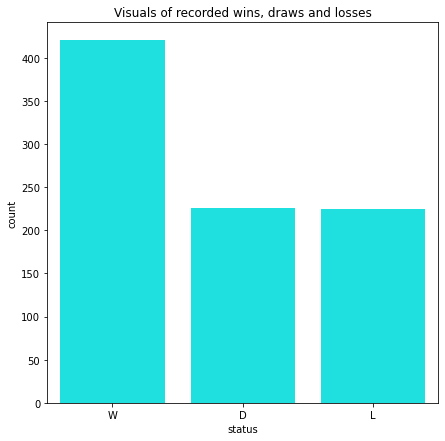

In [351]:
plt.figure(figsize=(7,7))
sns.countplot(x='status', data=ranked, color='cyan')
plt.title('Visuals of recorded wins, draws and losses')
plt.show()

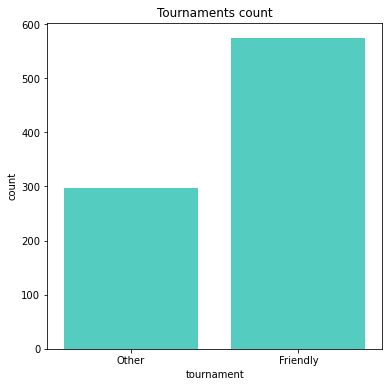

In [352]:
plt.figure(figsize=(6,6))
sns.countplot(x='tournament', data=ranked, color='turquoise')
plt.title('Tournaments count')
plt.show()

In [353]:
# Measures of dispersion

variables = ['home_score', 'away_score']

for i in variables:
    print(f"For {i}:\n")
    print(f"Standard deviation  : {ranked[i].std()}")
    print(f"Mean:  {ranked[i].mean()}")
    print(f"Mode: {ranked[i].mode()}")
    print(f"Median: {ranked[i].median()}")
    print(f"Skewness: {ranked[i].skew()}")
    print(f"Kurtosis: {ranked[i].kurt()}")
    print("======================================")


For home_score:

Standard deviation  : 1.9059597949971165
Mean:  1.632606199770379
Mode: 0    1
dtype: int64
Median: 1.0
Skewness: 5.524378027487254
Kurtosis: 68.55786471188769
For away_score:

Standard deviation  : 1.1546913954590317
Mean:  1.0045924225028702
Mode: 0    0
dtype: int64
Median: 1.0
Skewness: 1.7465685613790902
Kurtosis: 5.24032836211406


## Bivariate analysis

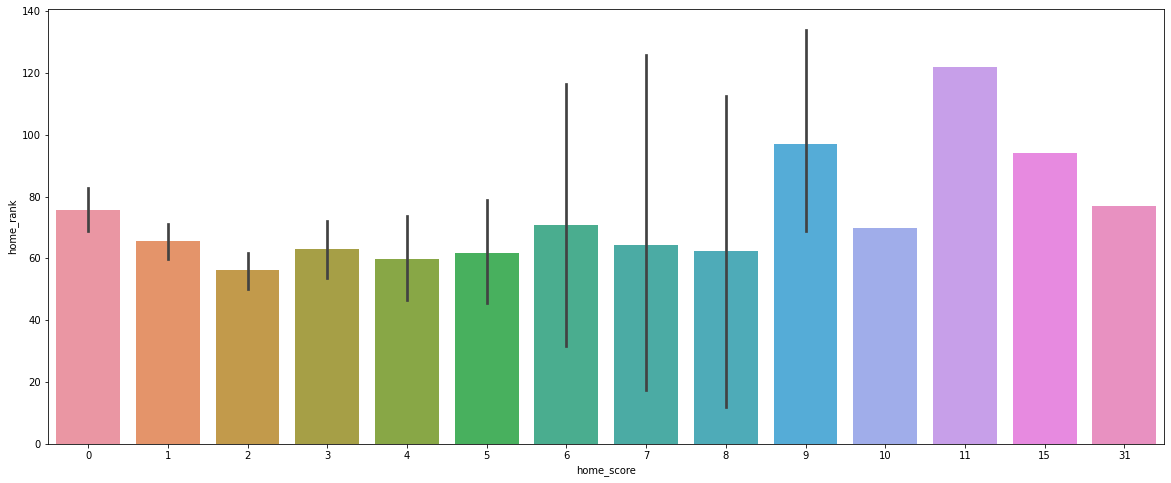

In [357]:
# How rank compares to goals scored

plt.figure(figsize=(20,8))
sns.barplot(y='home_rank', x='home_score', data=ranked)
plt.show()

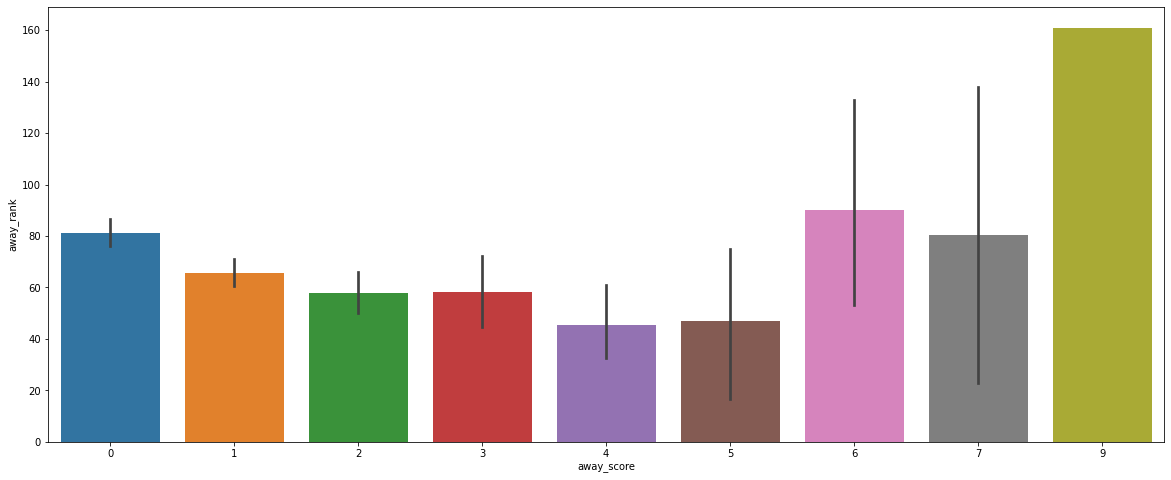

In [358]:
plt.figure(figsize=(20, 8))
sns.barplot(x='away_score', y='away_rank', data=ranked)
plt.show()

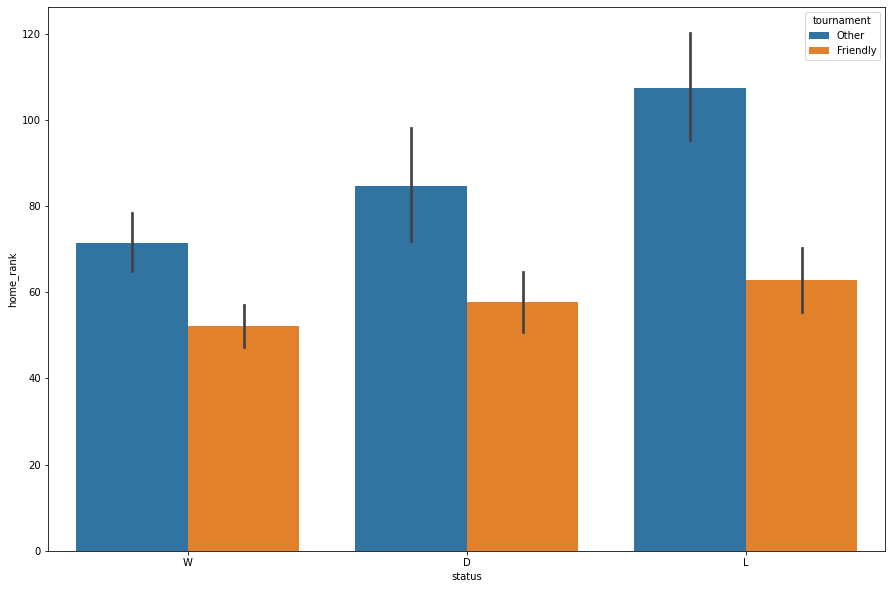

In [360]:
plt.figure(figsize=(15,10))
sns.barplot(x='status', y='home_rank', data=ranked, hue='tournament')
plt.show()

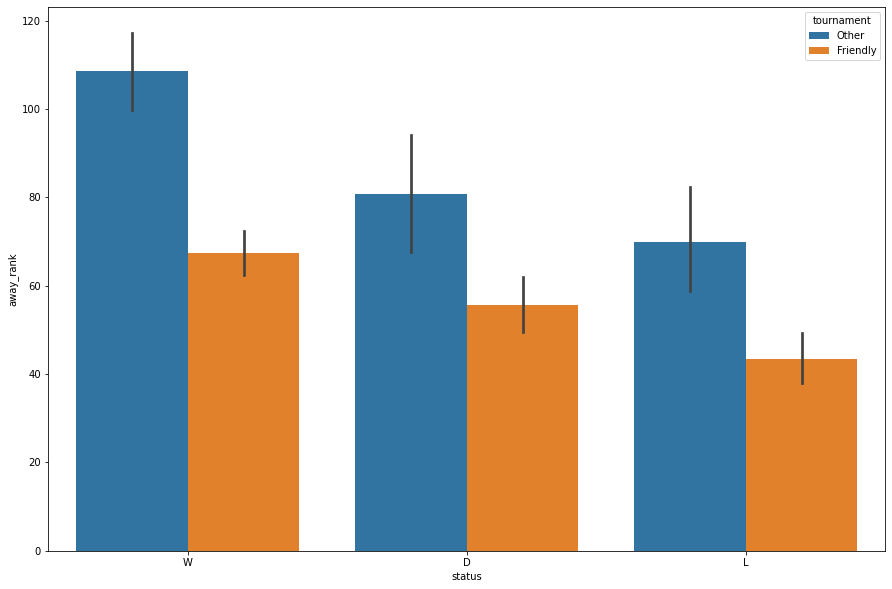

In [361]:
plt.figure(figsize=(15,10))
sns.barplot(x='status', y='away_rank', data=ranked, hue='tournament')
plt.show()

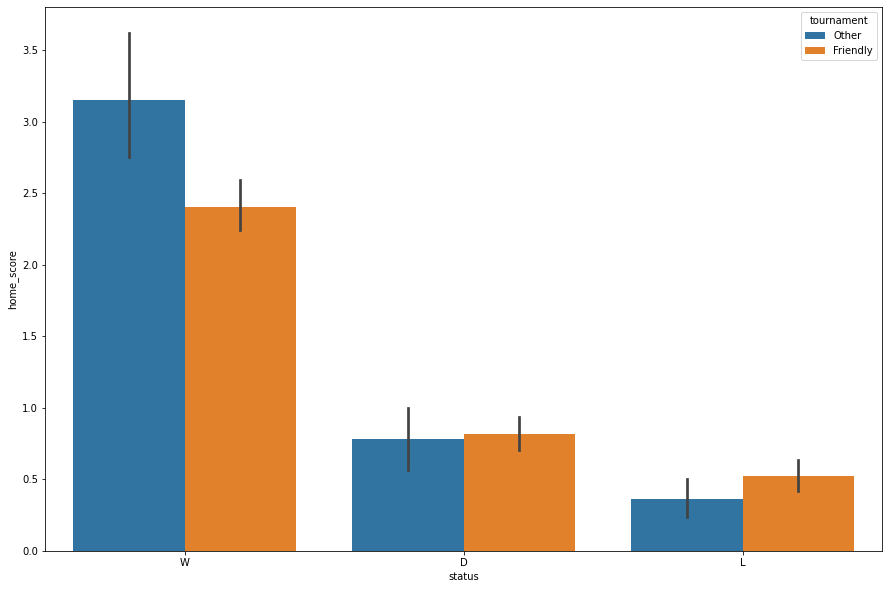

In [362]:
plt.figure(figsize=(15,10))
sns.barplot(x='status', y='home_score', data=ranked, hue='tournament')
plt.show()

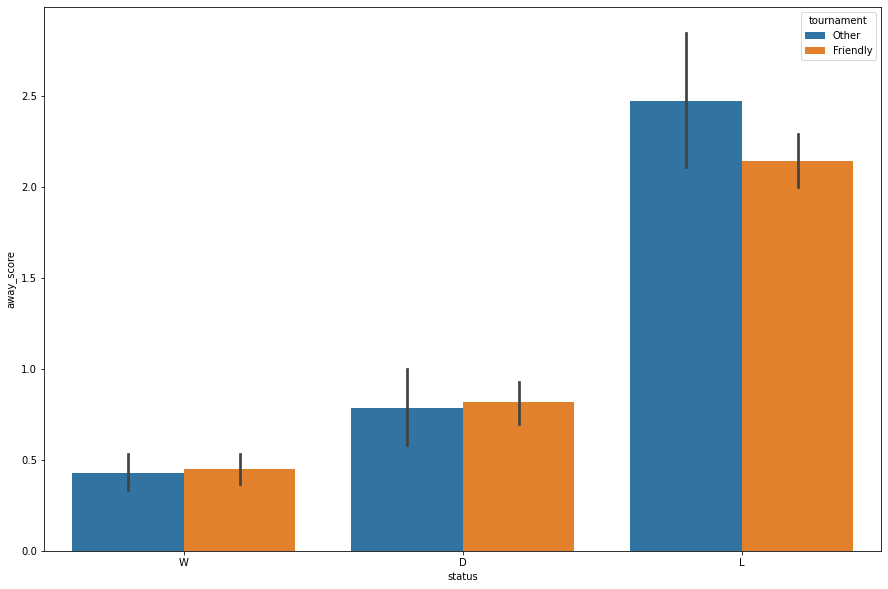

In [363]:
plt.figure(figsize=(15,10))
sns.barplot(x='status', y='away_score', data=ranked, hue='tournament',)
plt.show()

## **Findings**


1. The most recorded match status is Wins with Losses and Draws tying for second place
2. The ranked dataset only has Friendlies and Category: Other types of matches. World Cup matches were not ranked and therefore    do not appear here
3. Some teams with the largest rank(which is a low rank in actuality) scored more goals than those with a better rank in both
   home and away categories.
4. Home teams with a poor ranks recorded a higher numbers in Wins, Losses and Draws as compared to home teams with better
   ranks.


## **PREPARING THE DATA FOR MODELING**

Features needed for Polynomial approach:
- Rank of home team
- Rank of away team
- Tournament type

Dependent varibale is:
- For model 1 : home_team score
- For model 2 : away_team score

Features needed for Logistc approach:
- Rank of home team
- Rank of away team
- Tournament type

Dependent variable is:
- Status of match result(from the home team's perspective)

#### Polynomial Approach

In [365]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [368]:
# Label encoding the Tournament and Status variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ranked['tournament'] = encoder.fit_transform(ranked['tournament'])
ranked['status'] = encoder.fit_transform(ranked['status'])
ranked.head()

<ipython-input-368-594242e780df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranked['tournament'] = encoder.fit_transform(ranked['tournament'])
<ipython-input-368-594242e780df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranked['status'] = encoder.fit_transform(ranked['status'])


,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank
17915,1993-08-08,Bolivia,Uruguay,3,1,1,2,59,22
17916,1993-08-08,Brazil,Mexico,1,1,0,0,8,14
17917,1993-08-08,Ecuador,Venezuela,5,0,1,2,35,94
17918,1993-08-08,Guinea,Sierra Leone,1,0,0,2,65,86
17919,1993-08-08,Paraguay,Argentina,1,3,1,1,67,5


In [419]:
X = ranked[['home_rank', 'away_rank', 'tournament']].values
# The dependent variable will be the home score this time
y = ranked['home_score'].values

In [420]:
# Baseline linear model
baseline = LinearRegression()
baseline.fit(X, y)

LinearRegression()

In [421]:
# Scoring the model
from sklearn.metrics import r2_score

base_results = r2_score(y, baseline.predict(X))
base_results

0.16032978158901734

In [426]:
# Using polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_poly  = poly_reg.fit_transform(X)

# Train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=23)


p_regressor = LinearRegression()
p_regressor.fit(X_train, y_train)

LinearRegression()

In [427]:
r2_score(y_test, p_regressor.predict(X_test))

0.15184415550351005

In [428]:
# Trying a higher degree.
# Using polynomial regression
poly_reg = PolynomialFeatures(degree=3)
X_poly  = poly_reg.fit_transform(X)

# Train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=23)


p_regressor3 = LinearRegression()
p_regressor3.fit(X_train, y_train)

LinearRegression()

In [429]:
r2_score(y_test, p_regressor3.predict(X_test))

0.09743605435897451

In [430]:
# The accuracy falls to 9% which is worse

In [431]:
ranked.head()

,date,home_team,away_team,home_score,away_score,tournament,status,home_rank,away_rank
17915,1993-08-08,Bolivia,Uruguay,3,1,1,2,59,22
17916,1993-08-08,Brazil,Mexico,1,1,0,0,8,14
17917,1993-08-08,Ecuador,Venezuela,5,0,1,2,35,94
17918,1993-08-08,Guinea,Sierra Leone,1,0,0,2,65,86
17919,1993-08-08,Paraguay,Argentina,1,3,1,1,67,5


In [433]:
# Model 2: Predicting away_scores
X = ranked[['home_rank', 'away_rank', 'tournament']].values
y = ranked['away_score'].values

In [435]:
# Transforming the X variable to a polynomial one

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=23)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

In [436]:
# Scoring this model with 2 polynomial degrees

r2_score(y_test, model_2.predict(X_test))

0.11067662096595987

In [453]:
# Trying a higher degree of polynomial
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=23)

model_22 = LinearRegression()
model_22.fit(X_train, y_train)

LinearRegression()

In [454]:
# Scoring the higher degree polynomial
r2_score(y_test, model_22.predict(X_test))

0.12696159937939522

#### Logistic Approach

In [455]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(n_jobs=-1)

In [456]:
X = ranked[['home_rank', 'away_rank', 'tournament']].values
y = ranked['status'].values

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


In [458]:
log.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [470]:
r2_score(y_test, log.predict(X_test))

-0.44826444717677094

### Cross validation

In [471]:
log_accuracy = cross_val_score(estimator=log,
                              X=X_train,
                              y=y_train,
                              cv = 5,
                              scoring='r2')

In [472]:
log_accuracy.mean()

-0.49148540328119256

In [473]:
log_accuracy

array([-0.57743575, -0.44404868, -0.4969875 , -0.43417683, -0.50477826])

## Conclusions

The Linear models, both the baseline and the Polynomial models both returned low accuracy scores that indicated that the relationship between the target and the predictor variables was not linear in any way.
The Logistic Regression model proved to be a significantly better fit yielding an average absolute mean of 49% after cross validation.

Perhaps the models would improve significantly if there were other variables present say for example, the presence of certain influential players who might affect the results of the matches. Moreover, there may be better models suitable for this classification outside of Logisitic and Polynomial Regressions